<a href="https://colab.research.google.com/github/yeabsiramoges/AIRMAEnergyForcasting/blob/main/EnergyTimeSeriesForcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

<ipython-input-2-9174b814a709>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


<Axes: title={'center': 'PJM East'}, xlabel='Datetime'>

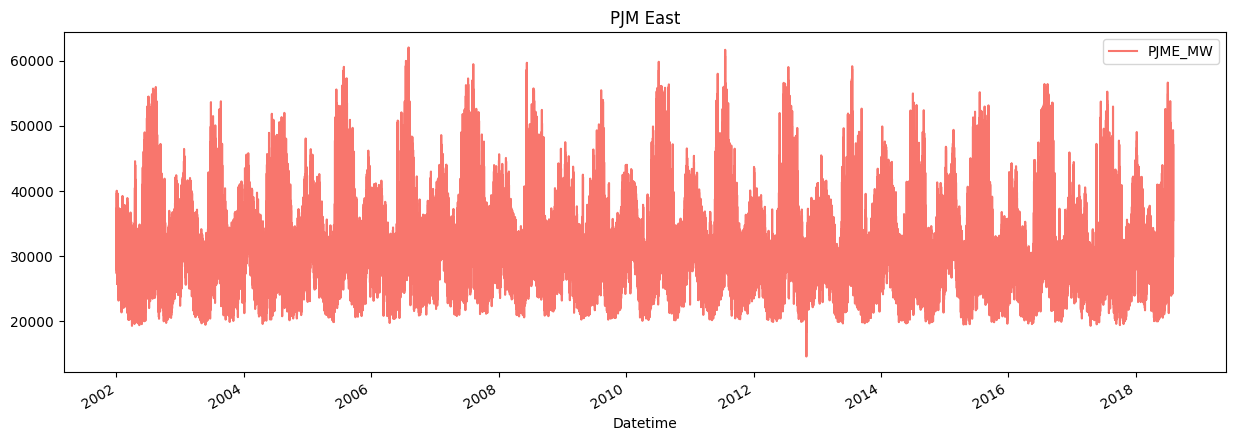

In [4]:
dataset = read_csv('/PJME_hourly.csv', index_col=[0], parse_dates=[0])
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
dataset.plot(style='-', figsize=(15,5), color=color_pal[0], title='PJM East')

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

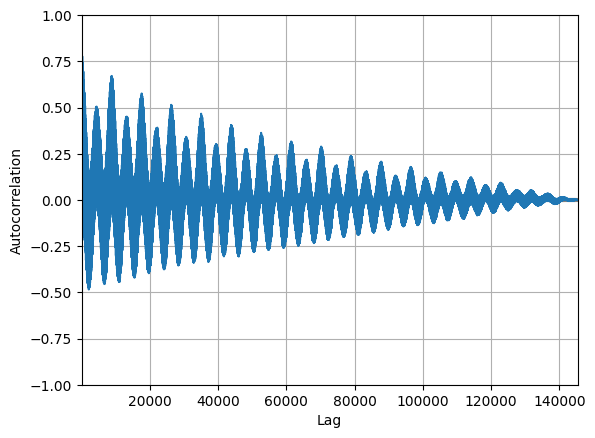

In [5]:
autocorrelation_plot(dataset)

In [6]:
import os
import warnings
import torch
from torch import nn

warnings.filterwarnings('ignore')

In [10]:
class FCM(nn.Module):
  '''
  Fully connected neural network module.
  '''
  def __init__(self, input_size: int, output_size: int, hidden_size: int, n_hidden_layers: int, activation: str):
    super().__init__()
    net = []

    activation_fn = None

    match activation:
      case 'ReLu':
        activation_fn = nn.ReLU()
      case 'TanH':
        activation_fn = nn.Tanh()

    # input layer
    net.extend([
        nn.Linear(input_size, hidden_size),
        activation_fn
    ])

    # hidden layers
    for _ in range(n_hidden_layers):
      net.extend([
          nn.Linear(hidden_size, hidden_size),
          activation_fn
      ])

    # output layer
    net.extend([
        nn.Linear(hidden_size, output_size)
    ])
    self.sequential = nn.Sequential(*net)

  def forward(self, data: torch.Tensor) -> torch.Tensor:
    '''
    Performs forward step of model.
    Args:
      data: batch_size x n_timesteps_in shape tensor
    Return:
      Tensor model compuation output
    '''
    return self.sequential(data)

In [11]:
# Model Parameters
input_size = 5
output_size = 2
hidden_size = 10
n_hidden_layers = 2
activation = 'ReLu'

# FCM Model
model = FCM(
    input_size,
    output_size,
    hidden_size,
    n_hidden_layers,
    activation
)

# Sample Data and Modeling
data = torch.rand(20, 5)
model(data).shape


torch.Size([20, 2])